# Prova Final Business Analytics
Gustavo Pohlmann Gonzaga

Marina Di Martino

Lucas Busani Xavier

Said Dargham

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
# Plots e estatisticas
%matplotlib inline
import matplotlib.pyplot as plt  # Gráficos
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew # Para ver as estatísticas
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder # sklearn para Machine Learning
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#os.chdir(r'C:\Users\Pohlmann\Documents\FGV\9º Semestre\Business Analytics\ProvaFinal\caso blu365')

In [5]:
df = pd.read_excel('blu365_dataset_estudodecaso.xlsx')
df.head()

,datadisparo,ddd,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,data_atraso,valor,operadora,...,data_maisantiga_acesso,sms_total_tent,idade,genero,compradoronline,vendedoronline,utilizacaoweb,rendaestimada,acesso,acordo
0,2020-05-19,62,0,0,0,0,0,2019-05-24,126.21,Claro,...,NaT,0,22.0,M,H,H,H,NaN,0,0
1,2020-04-27,67,3,0,0,0,0,2017-04-14,244.29,Vivo,...,NaT,3,56.0,F,D,H,D,ATE 2 SM,0,0
2,2020-05-14,51,1,0,0,0,0,2019-09-04,51.00,Claro,...,NaT,1,45.0,M,B,H,B,ATE 2 SM,0,0
3,2020-05-13,51,0,0,0,0,0,2019-11-14,307.91,Tim,...,NaT,0,35.0,F,B,H,B,4 A 10 SM,0,0
4,2020-05-25,62,0,0,12,0,0,2017-03-14,154.12,Tim,...,NaT,12,43.0,F,A,H,A,NaN,0,0


In [6]:
df.columns

Index(['datadisparo', 'ddd', 'sms_entregue', 'sms_enviado', 'sms_naoentregue',
       'sms_rejeitado', 'sms_invalido', 'data_atraso', 'valor', 'operadora',
       'qtd_hist_acessos', 'data_maisrecente_acesso', 'data_maisantiga_acesso',
       'sms_total_tent', 'idade', 'genero', 'compradoronline',
       'vendedoronline', 'utilizacaoweb', 'rendaestimada', 'acesso', 'acordo'],
      dtype='object')

In [7]:
df.info() # data_maisrecente_acesso muito valor empty, idem data_maisantiga_acesso
# idade, genero, compradoronline, vendedoronline, utilizacaoweb e rendaestimada com vazios tambem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686383 entries, 0 to 686382
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   datadisparo              686383 non-null  datetime64[ns]
 1   ddd                      686383 non-null  int64         
 2   sms_entregue             686383 non-null  int64         
 3   sms_enviado              686383 non-null  int64         
 4   sms_naoentregue          686383 non-null  int64         
 5   sms_rejeitado            686383 non-null  int64         
 6   sms_invalido             686383 non-null  int64         
 7   data_atraso              686383 non-null  datetime64[ns]
 8   valor                    686383 non-null  float64       
 9   operadora                686383 non-null  object        
 10  qtd_hist_acessos         686383 non-null  int64         
 11  data_maisrecente_acesso  77512 non-null   datetime64[ns]
 12  data_maisantiga_

In [8]:
df.describe()
# idade tem valor máximo 136. como a pessoa mais velha do mundo faleceu aos 122 anos,
# valores acima de 100 serão considerados erros e o dígito das centenas será desconsiderado

,ddd,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,valor,qtd_hist_acessos,sms_total_tent,idade,acesso,acordo
count,686383.000000,686383.000000,686383.000000,686383.000000,686383.000000,686383.0,686383.000000,686383.000000,686383.000000,684648.000000,686383.000000,686383.000000
mean,54.100716,2.225027,0.050928,0.938616,0.002046,0.0,268.770910,0.182840,3.208181,40.644479,0.027453,0.003374
std,11.441091,3.472402,0.649311,2.474068,0.185847,0.0,291.660576,0.655077,3.755364,14.697298,0.163398,0.057990
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.300000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,110.520000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.0,225.970000,0.000000,2.000000,38.000000,0.000000,0.000000
75%,62.000000,3.000000,0.000000,0.000000,0.000000,0.0,343.995000,0.000000,5.000000,49.000000,0.000000,0.000000
max,99.000000,23.000000,20.000000,22.000000,18.000000,0.0,61952.930000,20.000000,23.000000,136.000000,1.000000,1.000000


Primeiras proporções da BD

<AxesSubplot:>

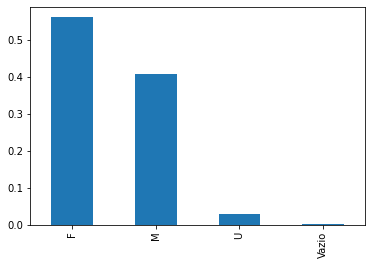

In [9]:
df.genero.fillna('Vazio').value_counts(normalize=True).plot(kind='bar')
# como Vazios tem pouca representatividade, serão substituidos pelo valor U, já na BD original

In [10]:
df.genero = df.genero.fillna('U')

<AxesSubplot:>

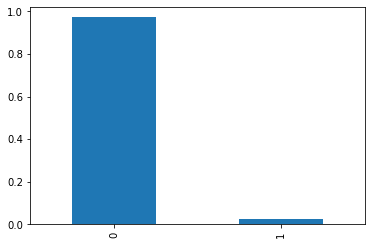

In [11]:
df.acesso.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

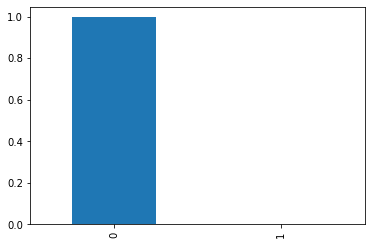

In [12]:
df.acordo.value_counts(normalize=True).plot(kind='bar')

In [13]:
df.rendaestimada.value_counts()
# rendaestimada tem uma categoria SEM INFORMACAO, valores vazios serão considerados como desta categoria

ATE 2 SM          384469
2 A 4 SM           78084
4 A 10 SM          42332
10 A 20 SM         10014
ACIMA DE 20 SM      5482
SEM INFORMACAO        75
DE 1 A 1,5 SM         26
1/2 A 1 SM             1
Name: rendaestimada, dtype: int64

<AxesSubplot:>

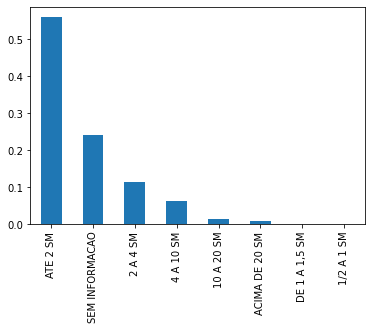

In [14]:
df.rendaestimada.fillna('SEM INFORMACAO').value_counts(normalize=True).plot(kind='bar')

In [15]:
# labelling sequencialmente
df['rendaestimada_labelled'] = df.rendaestimada
df.rendaestimada_labelled = df.rendaestimada_labelled.str.replace('1/2 A 1 SM', '1')
df.rendaestimada_labelled = df.rendaestimada_labelled.str.replace('DE 1 A 1,5 SM', '2')
df.rendaestimada_labelled = df.rendaestimada_labelled.str.replace('ATE 2 SM', '3')
df.rendaestimada_labelled = df.rendaestimada_labelled.str.replace('2 A 4 SM', '4')
df.rendaestimada_labelled = df.rendaestimada_labelled.str.replace('4 A 10 SM', '5')
df.rendaestimada_labelled = df.rendaestimada_labelled.str.replace('10 A 20 SM', '6')
df.rendaestimada_labelled = df.rendaestimada_labelled.str.replace('ACIMA DE 20 SM', '7')
df.rendaestimada_labelled = df.rendaestimada_labelled.str.replace('SEM INFORMACAO', '0')
df.rendaestimada_labelled.fillna('0', inplace=True) # se vazio, então Sem Informação, ou 0 nesse caso

In [16]:
df.rendaestimada_labelled = pd.to_numeric(df.rendaestimada_labelled)

In [17]:
df.rendaestimada_labelled.value_counts()

3    384469
0    165975
4     78084
5     42332
6     10014
7      5482
2        26
1         1
Name: rendaestimada_labelled, dtype: int64

In [18]:
df.idade = df.idade.apply(lambda x: x-100 if x>100 else x) # limpando erros de pessoas com mais de 100 anos

<AxesSubplot:ylabel='Frequency'>

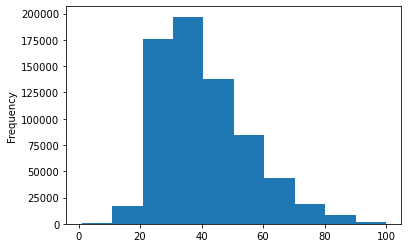

In [19]:
df.idade.plot(kind='hist')

In [20]:
df.sms_invalido.value_counts() # coluna repleta de 0s, não tras novas infos ao modelo

0    686383
Name: sms_invalido, dtype: int64

In [21]:
df.drop('sms_invalido',axis=1, inplace=True)

In [22]:
df['erro_data'] = df.data_atraso>df.datadisparo

In [23]:
df.erro_data.value_counts() # não temos situações em que a data de atraso é posterior à data de disparo

False    686383
Name: erro_data, dtype: int64

In [24]:
df.drop('erro_data', axis=1, inplace=True)

In [25]:
df.ddd.value_counts() # 67 DDDs distintos

41    99859
61    92300
62    66396
51    60965
67    52431
47    36109
65    27911
69    24451
48    24057
44    23982
42    22494
43    19030
64    17363
45    15253
66    14393
63    14127
55    13763
68    11485
49     9262
53     8898
54     8806
11     5743
46     3792
21     1130
14      929
19      792
18      721
99      645
91      638
98      522
34      514
13      466
31      425
15      400
94      389
86      376
38      375
17      350
16      344
85      340
77      281
81      273
12      264
83      262
88      254
84      213
92      209
71      204
27      201
82      187
35      185
79      171
73      161
22      153
89      145
75      144
93      131
87      106
95       92
32       90
96       80
97       77
33       66
24       65
37       57
74       54
28       32
Name: ddd, dtype: int64

### Análise das relações entre variáveis

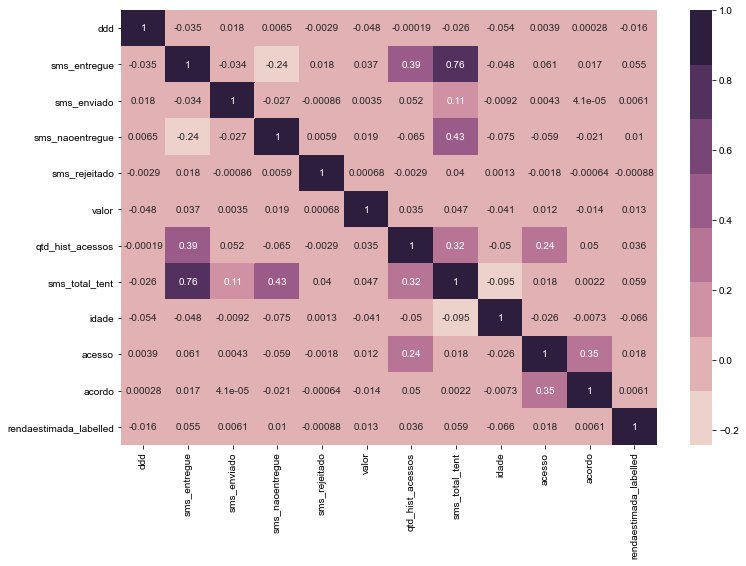

In [26]:
# Heatmap de correlações
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap = sns.cubehelix_palette(8, start=0), annot=True)
sns.set(font_scale=1.0)

plt.yticks(rotation=0)
plt.xticks(rotation=90)

y_train = df.acesso.values

Text(0, 0.5, 'acessos')

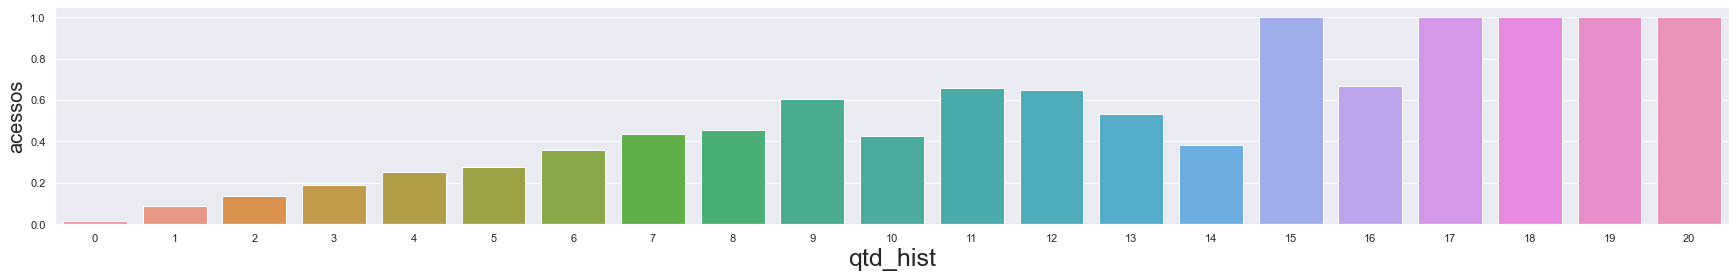

In [27]:
fig, axis1 = plt.subplots(1,1,figsize=(30,4))
average_qtd = df[["qtd_hist_acessos", "acesso"]].groupby(['qtd_hist_acessos'],as_index=False).mean()
sns.barplot(x='qtd_hist_acessos', y='acesso', data=average_qtd)
plt.xlabel('qtd_hist', fontsize=25)
plt.ylabel('acessos', fontsize=20)
# em geral, quanto maior qtd_hist_acessos, maior a probabilidade de acesso

Text(0, 0.5, 'acessos')

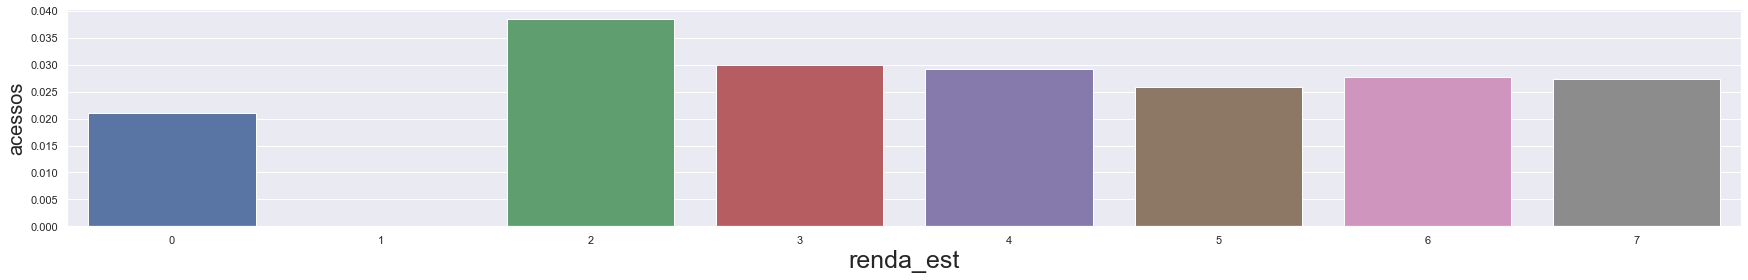

In [28]:
fig, axis1 = plt.subplots(1,1,figsize=(30,4))
average_qtd = df[["rendaestimada_labelled", "acesso"]].groupby(['rendaestimada_labelled'],as_index=False).mean()
sns.barplot(x='rendaestimada_labelled', y='acesso', data=average_qtd)
plt.xlabel('renda_est', fontsize=25)
plt.ylabel('acessos', fontsize=20)
# sem relação clara, com exceção de que pessoas de renda 1 têm probabilidade quase 0

<AxesSubplot:xlabel='genero', ylabel='acesso'>

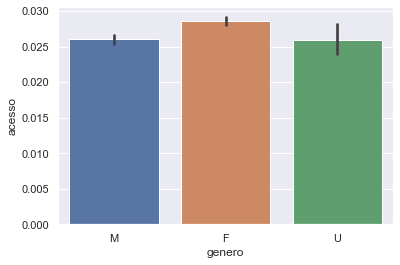

In [29]:
sns.barplot(x='genero',y='acesso', data=df) # pouca relação aparente entre genero e acesso

Text(0, 0.5, 'acessos')

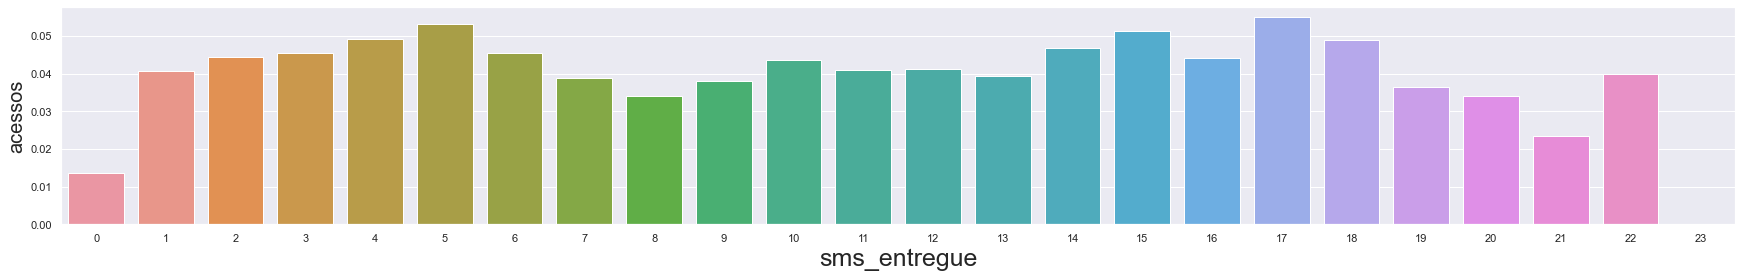

In [30]:
fig, axis1 = plt.subplots(1,1,figsize=(30,4))
average_qtd = df[["sms_entregue", "acesso"]].groupby(['sms_entregue'],as_index=False).mean()
sns.barplot(x='sms_entregue', y='acesso', data=average_qtd)
plt.xlabel('sms_entregue', fontsize=25)
plt.ylabel('acessos', fontsize=20)
# em geral, existem picos de eficácia do numero de sms entregues

Text(0, 0.5, 'acessos')

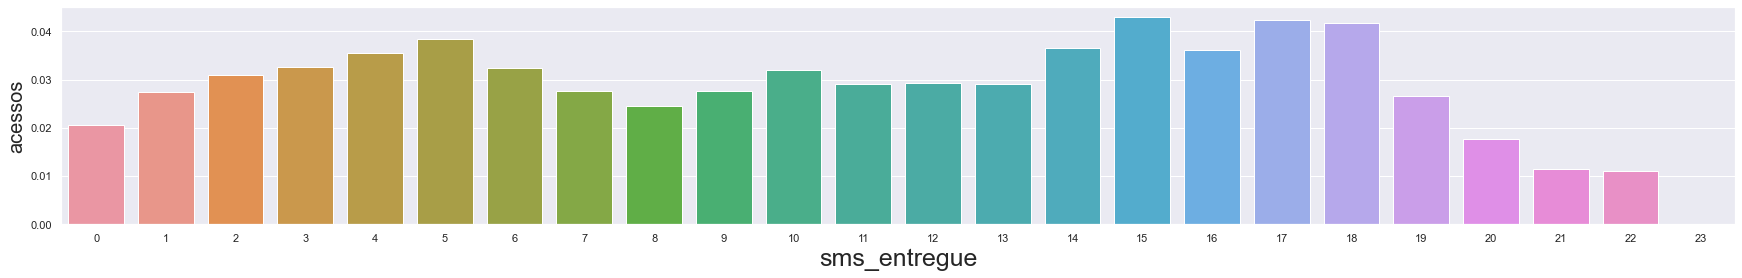

In [31]:
fig, axis1 = plt.subplots(1,1,figsize=(30,4))
average_qtd = df[["sms_total_tent", "acesso"]].groupby(['sms_total_tent'],as_index=False).mean()
sns.barplot(x='sms_total_tent', y='acesso', data=average_qtd)
plt.xlabel('sms_entregue', fontsize=25)
plt.ylabel('acessos', fontsize=20)

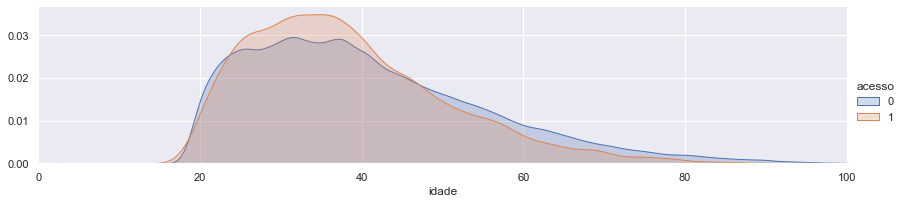

In [32]:
facet = sns.FacetGrid(df, hue="acesso",aspect=4)
facet.map(sns.kdeplot,'idade',shade= True)
facet.set(xlim=(0, df['idade'].max()))
facet.add_legend() # seguem distribuições parecidas com relação às idades

<AxesSubplot:xlabel='utilizacaoweb', ylabel='acesso'>

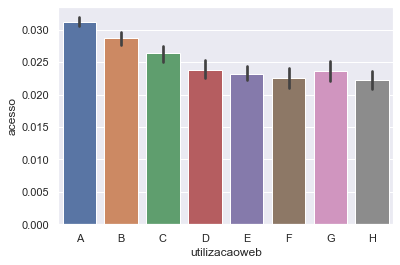

In [33]:
sns.barplot(x='utilizacaoweb',y='acesso', data=df, order=df.utilizacaoweb.value_counts().index.sort_values())
# maior probabilidade de acesso nas categorias A, B e C

In [34]:
(df.compradoronline==df.utilizacaoweb).value_counts() # comprador online é bem similar a utilizacaoweb

True     675218
False     11165
dtype: int64

<AxesSubplot:xlabel='compradoronline', ylabel='acesso'>

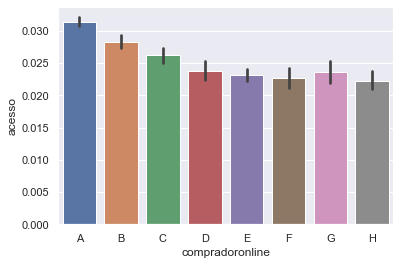

In [35]:
sns.barplot(x='compradoronline',y='acesso', data=df, order=df.compradoronline.value_counts().index.sort_values())

<AxesSubplot:xlabel='vendedoronline', ylabel='acesso'>

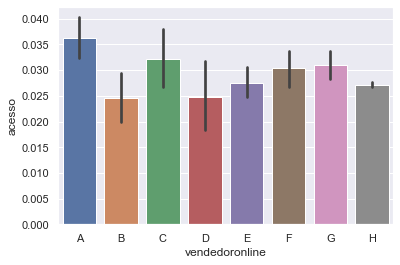

In [36]:
sns.barplot(x='vendedoronline',y='acesso', data=df, order=df.vendedoronline.value_counts().index.sort_values())
# maior desv pad nessa categoria

# Modelos
### Como acordos é uma fração dos acessos, obrigatoriamente, modelaremos os acessos
#### fazer train-test split com 30% da base (suficiente para treinar evitando overfitting)
#### usar label encoder para variáveis categóricas
#### normalizar variáveis numéricas para evitar pesos distorcidos a variáveis de maior ordem de grandeza
#### usar min-max scaler
##### testar: KNN, RegLog, ElasticNet

##### Features engineering

In [37]:
df.genero[df.genero=='M'] = 0
df.genero[df.genero=='F'] = 1
df.genero[df.genero=='U'] = 2

<ipython-input-37-05b5f271a29b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.genero[df.genero=='M'] = 0
<ipython-input-37-05b5f271a29b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.genero[df.genero=='F'] = 1
<ipython-input-37-05b5f271a29b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.genero[df.genero=='U'] = 2


In [38]:
df.dtypes

datadisparo                datetime64[ns]
ddd                                 int64
sms_entregue                        int64
sms_enviado                         int64
sms_naoentregue                     int64
sms_rejeitado                       int64
data_atraso                datetime64[ns]
valor                             float64
operadora                          object
qtd_hist_acessos                    int64
data_maisrecente_acesso    datetime64[ns]
data_maisantiga_acesso     datetime64[ns]
sms_total_tent                      int64
idade                             float64
genero                             object
compradoronline                    object
vendedoronline                     object
utilizacaoweb                      object
rendaestimada                      object
acesso                              int64
acordo                              int64
rendaestimada_labelled              int64
dtype: object

In [39]:
df.genero = df.genero.astype('str')

# transformando colunas categoricas em ints
for col in df.dtypes[df.dtypes.values=='object'].index:
    lbl = LabelEncoder()
    lbl.fit(list(df[col].values))
    df[col] = lbl.transform(list(df[col].values))

In [40]:
df.drop(['data_maisrecente_acesso', 'data_maisantiga_acesso'], axis=1, inplace=True)

In [41]:
df['Atraso-Disparo'] = df.datadisparo-df.data_atraso

In [42]:
df['Atraso-Disparo'] = df['Atraso-Disparo'].dt.days

In [43]:
for col in df.drop(['datadisparo','data_atraso'], axis=1).columns:
    df[col].fillna(df[col].median(), inplace=True) # preenchendo NaNs das colunas numéricas com suas medianas

In [44]:
# target and features variables
y = df['acesso'].values
x = df.drop(['acesso','acordo','rendaestimada', 'datadisparo','data_atraso'], axis=1).values

In [45]:
# para todas as colunas estarem entre 0 e 1
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.pandas.DataFrame(x_scaled)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

vizinhos = np.arange(1, 15)
train_accuracy = np.empty(len(vizinhos))
test_accuracy = np.empty(len(vizinhos))

for i, k in enumerate(vizinhos):
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Variando Número de Vizinhos')
plt.plot(vizinhos, train_accuracy, label = 'Training Accuracy')
plt.plot(vizinhos, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Número de Vizinhos')
plt.ylabel('Accuracy')
plt.show()

In [47]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

model = GNB.fit(X_train, y_train)

In [48]:
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.19344056211860103


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model


y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.19223951630527158


[[ 33998 166264]
 [    66   5587]]


              precision    recall  f1-score   support

           0       1.00      0.17      0.29    200262
           1       0.03      0.99      0.06      5653

    accuracy                           0.19    205915
   macro avg       0.52      0.58      0.18    205915
weighted avg       0.97      0.19      0.28    205915



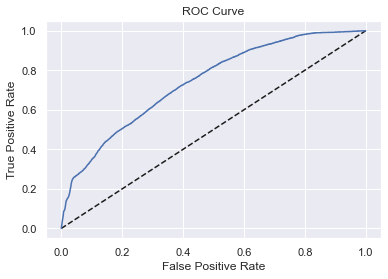

In [51]:
y_pred_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [53]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)

seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9479340983296597


In [54]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.9480902314061628


[[193821   6441]
 [  4248   1405]]


0.23064547902029023


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [58]:
y_pred = rf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.971595075638006


[[199674    588]
 [  5261    392]]


0.08307900983384198
